In [1]:
from datetime import datetime
from geopy import Nominatim
from tzwhere import tzwhere
from pytz import timezone, utc
import matplotlib.pyplot as plt
from skyfield.api import Star, load, wgs84
from skyfield.data import hipparcos
from skyfield.projections import build_stereographic_projection

In [2]:
# de421 shows position of earth and sun in space
eph = load('de421.bsp')
# hipparcos dataset contains star location data
with load.open(hipparcos.URL) as f:
    stars = hipparcos.load_dataframe(f)

C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tzwhere\tzwhere.py:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.timezoneNamesToPolygons[tzname] = WRAP(polys)


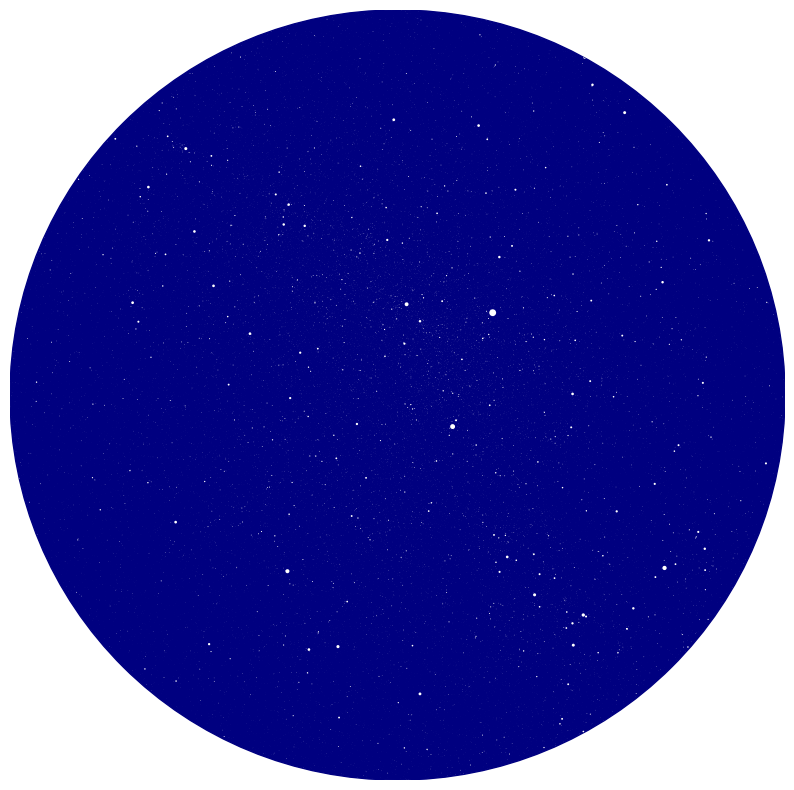

In [3]:
from matplotlib.patches import Circle

location = 'Parel, Mumbai, India'
when = '2023-08-16 00:00'

locator = Nominatim(user_agent='vedantsawanttestapp')
location = locator.geocode(location)

lat, long = location.latitude, location.longitude

# convert date string into datetime object
dt = datetime.strptime(when, '%Y-%m-%d %H:%M')
# define datetime and convert to utc based on our timezone
timezone_str = tzwhere.tzwhere().tzNameAt(lat, long)
local = timezone(timezone_str)
# get UTC from local timezone and datetime
local_dt = local.localize(dt, is_dst=None)
utc_dt = local_dt.astimezone(utc)

# find location of earth and sun and set the observer position
sun = eph['sun']
earth = eph['earth']
# define observation time from our UTC datetime
ts = load.timescale()
t = ts.from_datetime(utc_dt)
# define an observer using the world geodetic system data
observer = wgs84.latlon(latitude_degrees=lat, longitude_degrees=long).at(t)
position = observer.from_altaz(alt_degrees=90, az_degrees=0)

ra, dec, distance = observer.radec()
center_object = Star(ra=ra, dec=dec)

center = earth.at(t).observe(center_object)
projection = build_stereographic_projection(center)

star_positions = earth.at(t).observe(Star.from_dataframe(stars))
stars['x'], stars['y'] = projection(star_positions)

chart_size = 10
max_star_size = 100
limiting_magnitude = 10
bright_stars = (stars.magnitude <= limiting_magnitude)
magnitude = stars['magnitude'][bright_stars]
                  
fig, ax = plt.subplots(figsize=(chart_size, chart_size))
 
border = plt.Circle((0, 0), 1, color='navy', fill=True)
ax.add_patch(border)

marker_size = max_star_size * 10 ** (magnitude / -2.5)

ax.scatter(stars['x'][bright_stars], stars['y'][bright_stars], 
           s=marker_size, color='white', 
           marker='.', linewidths=0, zorder=2)

horizon = Circle((0, 0), radius=1, transform=ax.transData)
for col in ax.collections:
    col.set_clip_path(horizon)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.axis('off')
plt.show()

C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tzwhere\tzwhere.py:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.timezoneNamesToPolygons[tzname] = WRAP(polys)


AttributeError: 'Geocentric' object has no attribute 'at'

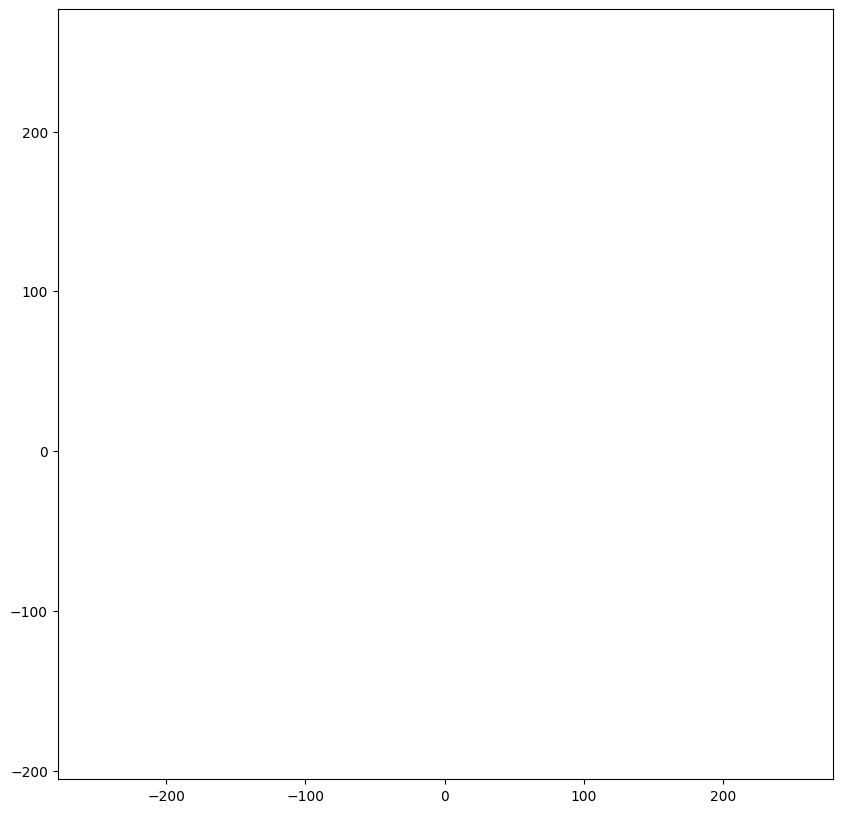

In [6]:
from datetime import datetime
from geopy.geocoders import Nominatim
from tzwhere import tzwhere
from pytz import timezone, utc
import matplotlib.pyplot as plt
from skyfield.api import Star, load, wgs84
from skyfield.data import hipparcos
from skyfield.projections import build_stereographic_projection
from matplotlib.patches import Circle

# Load planetary and star data
eph = load('de421.bsp')  # Planetary ephemeris
with load.open(hipparcos.URL) as f:
    stars = hipparcos.load_dataframe(f)  # Star data from Hipparcos catalog

# Get user input for location and time
# location_str = input("Enter location (city, country): ")
location_str = "Mumbai, India"
# when_str = input("Enter date and time (YYYY-MM-DD HH:MM): ")
when_str = "2023-08-21 19:18"

# Initialize Nominatim and retrieve location coordinates
locator = Nominatim(user_agent='vedantsawanttestapp')
location = locator.geocode(location_str)
lat, long = location.latitude, location.longitude

# Convert user input date string to datetime object
dt = datetime.strptime(when_str, '%Y-%m-%d %H:%M')

# Determine timezone at the location
timezone_str = tzwhere.tzwhere().tzNameAt(lat, long)
local = timezone(timezone_str)

# Convert local datetime to UTC
local_dt = local.localize(dt, is_dst=None)
utc_dt = local_dt.astimezone(utc)

# Define observer's location using WGS84
ts = load.timescale()
t = ts.from_datetime(utc_dt)
observer = wgs84.latlon(latitude_degrees=lat, longitude_degrees=long).at(t)

# Define sun and earth positions at the specified time
sun = eph['sun']
earth = eph['earth']

# Compute observer's position
position = observer.from_altaz(alt_degrees=90, az_degrees=0)
ra, dec, distance = observer.radec()
center_object = Star(ra=ra, dec=dec)
center = earth.at(t).observe(center_object)

# Build stereographic projection centered on the observer
projection = build_stereographic_projection(center)

# Project star positions onto the projection
star_positions = earth.at(t).observe(Star.from_dataframe(stars))
stars['x'], stars['y'] = projection(star_positions)

# Plotting parameters
chart_size = 10
max_star_size = 100
limiting_magnitude = 10

# Select bright stars based on limiting magnitude
bright_stars = (stars.magnitude <= limiting_magnitude)
magnitude = stars['magnitude'][bright_stars]
marker_size = max_star_size * 10 ** (magnitude / -2.5)

# Create the plot
fig, ax = plt.subplots(figsize=(chart_size, chart_size))
border = plt.Circle((0, 0), 1, color='navy', fill=True)
ax.add_patch(border)

# Scatter plot of star positions
ax.scatter(stars['x'][bright_stars], stars['y'][bright_stars], 
           s=marker_size, color='white', 
           marker='.', linewidths=0, zorder=2)

# Plot star or body names
# for i, star_row in stars[bright_stars].iterrows():
#     ax.text(star_row['x'], star_row['y'], star_row['name'], color='white',
#             fontsize=8, ha='center', va='center')
# for i, star_row in stars[bright_stars].iterrows():
#     ax.text(star_row['x'], star_row['y'], star_row['star_name'], color='white',
#             fontsize=8, ha='center', va='center')

# Determine which planets are visible
visible_planets = ['mercury', 'venus', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']
visible_planet_positions = {}
for planet_name in visible_planets:
    planet = eph[planet_name]
    planet_geocentric = observer.at(t).observe(planet)
    planet_topocentric = planet_geocentric.apparent().from_altaz(observer.altaz())
    if planet_topocentric.altaz()[0].degrees > 0:  # If above the horizon
        visible_planet_positions[planet_name] = planet_topocentric

# Add positions of visible planets to the plot
planet_colors = {'mars': 'red', 'venus': 'yellow', 'jupiter': 'orange'}
for planet_name, planet_position in visible_planet_positions.items():
    x, y, _ = projection(planet_position.radec(epoch=ts.tt).position.au)
    ax.scatter(x, y, color=planet_colors.get(planet_name, 'white'), marker='o', s=100, zorder=3)

# Plot planet names
for planet_name, planet_position in visible_planet_positions.items():
    x, y, _ = projection(planet_position.radec(epoch=ts.tt).position.au)
    ax.text(x, y, planet_name.capitalize(), color='white', fontsize=10, ha='center', va='center', zorder=4)
# Clip stars below the horizon
horizon = Circle((0, 0), radius=1, transform=ax.transData)
for col in ax.collections:
    col.set_clip_path(horizon)

# Set plot limits and remove axis
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axis('off')

# Display the plot
plt.show()
